## 1.0 Import Function

In [1]:
!pip install yfinance 

## 2.0 Setup 

[*********************100%***********************]  5 of 5 completed


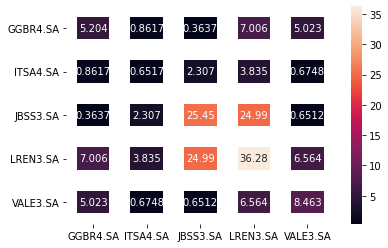

In [2]:
from META_TOOLBOX import *
import BOLSA_NEW as BOVESPA
ACOES = ['ITSA4.SA', 'VALE3.SA', 'GGBR4.SA', 'LREN3.SA', 'JBSS3.SA']
DATA_INICIAL = '2019-02-01'
DATA_FINAL = '2020-02-01'
DADOS_BOLSA ={'ID ACAO':ACOES, 'DATA INICIAL':DATA_INICIAL, 'DATA FINAL':DATA_FINAL}
DADOS_GERAIS, RETORNOS, COVARIANCIA = BOVESPA.DADOS_BOLSA_PRECO_AJUSTADO(DADOS_BOLSA)
OPCOES_GRAF={'ANNOT':True, 'LINEWIDTHS':20, 'FMT':'.4'}
BOVESPA.BOLSA_PLOT_001(COVARIANCIA,OPCOES_GRAF)

In [3]:
N_REP = 20
N_ITER = 50
N_POP = 20
D = 5
X_L = [0.00] * D
X_U = [1.00] * D
M = 2
GAMMA = GAMMA_ASSEMBLY(X_L, X_U, D, M)
NULL_DIC  = {'COVARIANCIA': COVARIANCIA, 'RETORNOS DIÁRIOS': RETORNOS}
SETUP_FA = {
         'N_REP': N_REP,
         'N_ITER': N_ITER,
         'N_POP': N_POP,
         'D': D,
         'X_L': X_L,
         'X_U': X_U,
         'BETA_0': 0.98,
         'ALPHA_MIN': 0.25,
         'ALPHA_MAX': 1.00,
         'THETA': 0.95,
         'GAMMA': GAMMA,
         'NULL_DIC': NULL_DIC
        }

In [4]:
# OBJ. Function
def OF_FUNCTION(X, NULL_DIC):
    DADOS_COV = NULL_DIC['COVARIANCIA']
    DADOS_RETORNO = NULL_DIC['RETORNOS DIÁRIOS']
    LAMBDA = 0.50
    OF = BOVESPA.FO_MARKOWITZ(X, DADOS_COV, DADOS_RETORNO, LAMBDA)
    H = np.abs(sum(X)) - 1
    for I_CONT in range(len(X)):
        OF += (H ** 2) * 1E6
    return OF

## 4.0 Example

In [5]:
[RESULTS_REP, BEST_REP, AVERAGE_REP, WORST_REP, STATUS] = FA_ALGORITHM_0001(OF_FUNCTION, SETUP_FA)

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Process Time: 52.95 Seconds 
 Seconds per repetition: 2.65
META_FA001_REP_0_BEST_0_20210913 200426.xlsx
META_FA001_REP_1_BEST_1_20210913 200426.xlsx
META_FA001_REP_2_BEST_2_20210913 200426.xlsx
META_FA001_REP_3_BEST_3_20210913 200426.xlsx
META_FA001_REP_4_BEST_4_20210913 200426.xlsx
META_FA001_REP_5_BEST_5_20210913 200426.xlsx
META_FA001_REP_6_BEST_6_20210913 200426.xlsx
META_FA001_REP_7_BEST_7_20210913 200426.xlsx
META_FA001_REP_8_BEST_8_20210913 200426.xlsx
META_FA001_REP_9_BEST_9_20210913 200427.xlsx
META_FA001_REP_10_BEST_10_20210913 200427.xlsx
META_FA001_REP_11_BEST_11_20210913 200427.xlsx
META_FA001_REP_12_BEST_12_20210913 200427.xlsx
META_FA001_REP_13_BEST_13_20210913 200427.xlsx
META_FA001_REP_14_BEST_14_20210913 200427.xlsx
META_FA001_REP_15_BEST_15_20210913 200427.xlsx
META_FA001_REP_16_BEST_16_20210913 200427.xlsx
META_FA001_REP_17_BEST_17_20210913 200427.xlsx
META_FA001_REP_18_BEST_18_20210913 2

In [6]:
BEST_REP_ID = STATUS[0]
BEST_REP_ID

19

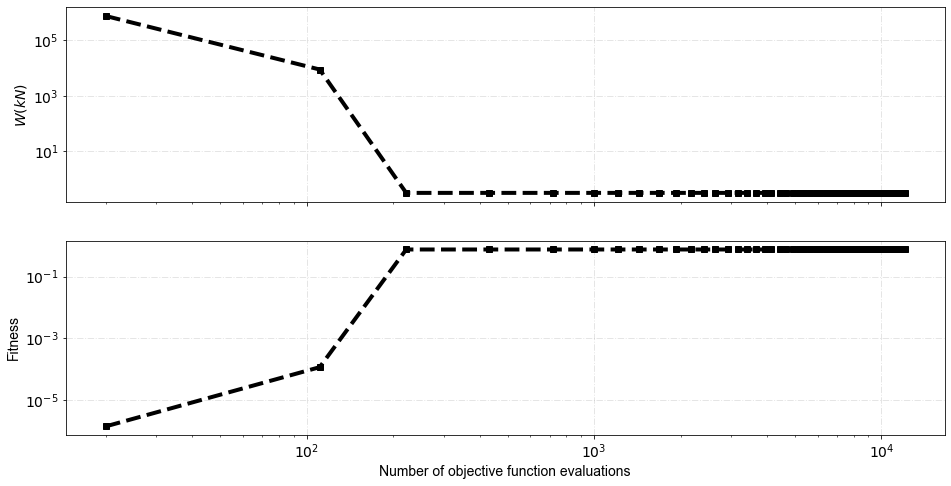

In [7]:
BEST = BEST_REP[BEST_REP_ID]
AVERAGE = AVERAGE_REP[BEST_REP_ID]
WORST = WORST_REP[BEST_REP_ID]
PLOT_SETUP = {
              'NAME': 'WANDER-OF',
              'WIDTH': 0.40, 
              'HEIGHT': 0.20,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'COLOR OF': '#000000',
              'MARKER OF': 's',
              'COLOR FIT': '#000000',
              'MARKER FIT': 's',
              'MARKER SIZE': 6,
              'LINE WIDTH': 4,
              'LINE STYLE': '--',
              'OF AXIS LABEL': '$W (kN) $',
              'X AXIS LABEL': 'Number of objective function evaluations',
              'LABELS SIZE': 14,
              'LABELS COLOR': '#000000',
              'X AXIS SIZE': 14,
              'Y AXIS SIZE': 14,
              'AXISES COLOR': '#000000',
              'ON GRID?': True,
              'Y LOG': True,
              'X LOG': True,
             }
DATASET = {'X': BEST['NEOF'], 'OF': BEST['OF'], 'FIT': BEST['FIT']}
META_PLOT_001(DATASET, PLOT_SETUP)

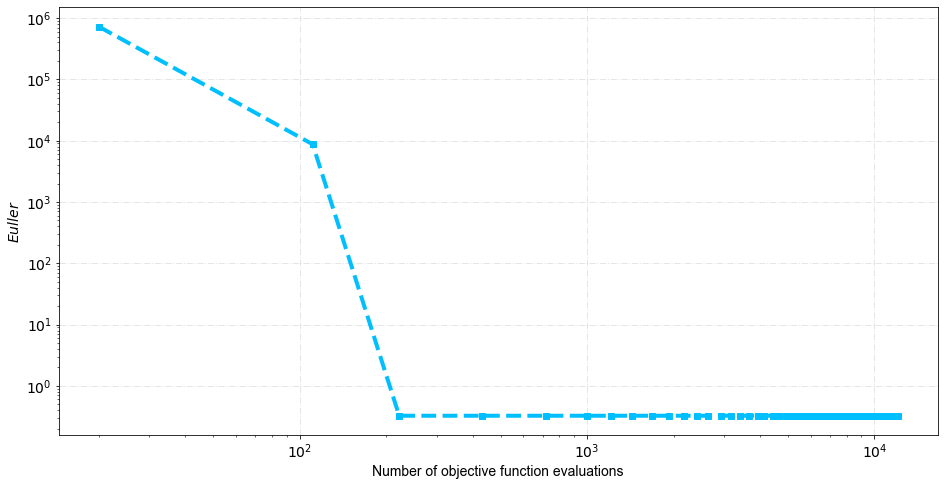

In [8]:
PLOT_SETUP = {
              'NAME': 'WANDER-OF',
              'WIDTH': 0.40, 
              'HEIGHT': 0.20,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'COLOR': '#00BFFF',
              'MARKER': 's',
              'MARKER SIZE': 6,
              'LINE WIDTH': 4,
              'LINE STYLE': '--',
              'Y AXIS LABEL': '$Euller$',
              'X AXIS LABEL': 'Number of objective function evaluations',
              'LABELS SIZE': 14,
              'LABELS COLOR': '#000000',
              'X AXIS SIZE': 14,
              'Y AXIS SIZE': 14,
              'AXISES COLOR': '#000000',
              'ON GRID?': True,
              'Y LOG': True,
              'X LOG': True,
             }
DATASET = {'X': BEST['NEOF'], 'Y': BEST['OF']}
META_PLOT_002(DATASET, PLOT_SETUP)

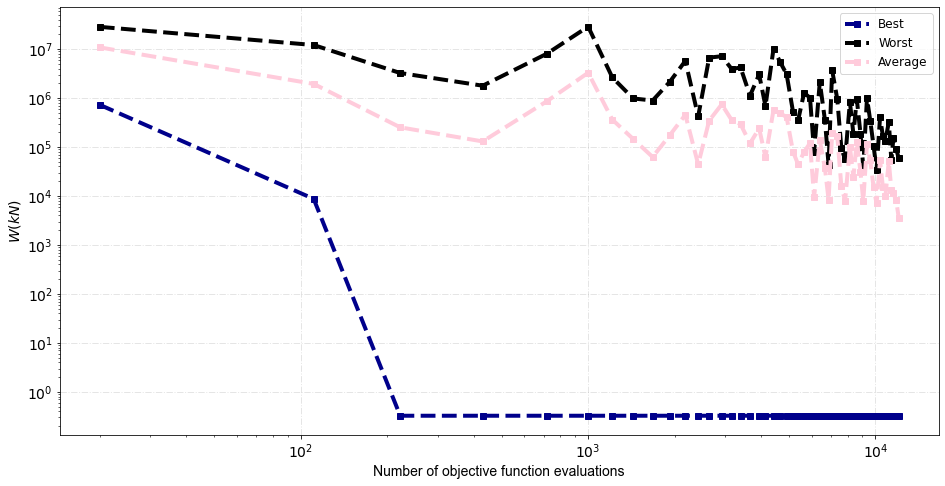

In [9]:
PLOT_SETUP = {
              'NAME': 'WANDER-OF',
              'WIDTH': 0.40, 
              'HEIGHT': 0.20,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'COLOR BEST': '#00008B',
              'COLOR WORST': '#000000',
              'COLOR AVERAGE': '#ffcbdb',
              'MARKER': 's',
              'MARKER SIZE': 6,
              'LINE WIDTH': 4,
              'LINE STYLE': '--',
              'Y AXIS LABEL': '$W (kN) $',
              'X AXIS LABEL': 'Number of objective function evaluations',
              'LABELS SIZE': 14,
              'LABELS COLOR': '#000000',
              'X AXIS SIZE': 14,
              'Y AXIS SIZE': 14,
              'AXISES COLOR': '#000000',
              'ON GRID?': True,
              'LOC LEGEND': 'upper right',
              'SIZE LEGEND': 12,
              'Y LOG': True,
              'X LOG': True
             }
DATASET = {'X': BEST['NEOF'], 'BEST': BEST['OF'], 'AVERAGE': AVERAGE['OF'], 'WORST': WORST['OF']}
META_PLOT_003(DATASET, PLOT_SETUP)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


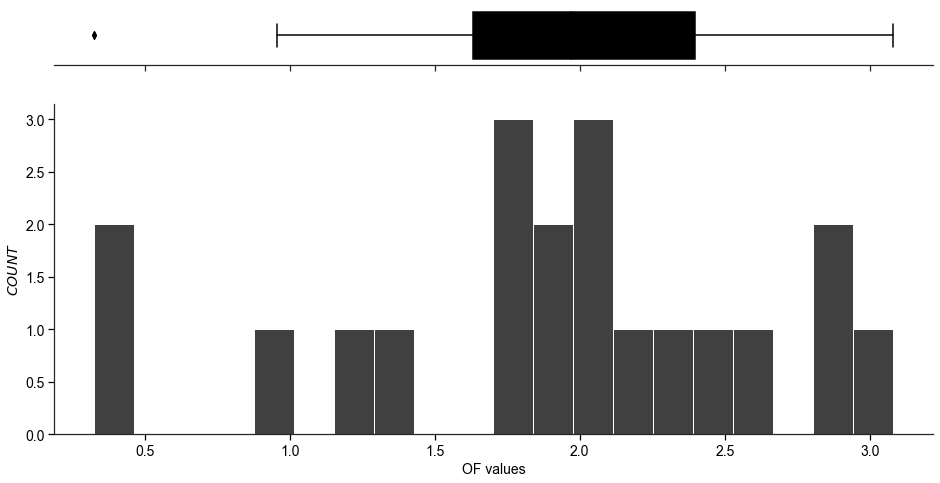

In [10]:
PLOT_SETUP = {
              'NAME': 'WANDER-OF',
              'WIDTH': 0.40, 
              'HEIGHT': 0.20,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'MARKER': 's',
              'X AXIS LABEL': 'OF values',
              'X AXIS SIZE': 14,
              'Y AXIS SIZE': 14,
              'LABELS SIZE': 14,
              'LABELS COLOR': '#000000',
              'COLOR': '#000000',
              'AXISES COLOR': '#000000',
              'BINS': 20,
              'KDE': False,
             }
DATASET = {'NUMBER OF REPETITIONS': N_REP, 'NUMBER OF ITERATIONS': N_ITER, 'OF OR FIT': 'OF', 'BEST': BEST_REP}
META_PLOT_004(DATASET, PLOT_SETUP)